In [4]:
#Fuente: Census Data Prediction
#Autor: Kyle Ockerlund
#https://www.kaggle.com/kyleockerlund/census-data-prediction?scriptVersionId=413840

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import neighbors 
from sklearn.model_selection import train_test_split #Cross validation
from sklearn.model_selection import cross_val_score

    
data = pd.read_csv("adult.csv")

In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


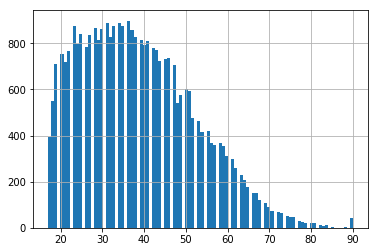

In [7]:
#Hacemos un histograma de las edades
data['age'].hist(bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD4B080>,
      dtype=object)

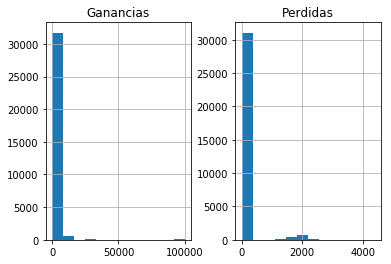

In [8]:
#Mostramos un histograma de las ganancias
capitals = pd.DataFrame({"Ganancias":data['capital.gain'], "Perdidas":data['capital.loss']})
capitals.hist(bins = 12)

In [9]:
#Reemplazamos nuestro target de ingresos, con 0 si es menor o igual a 50mil o 1 si es mayor
data['income'] = data['income'].replace({'<=50K': 0, '>50K':1}, regex=True)

In [22]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [27]:
#Usamos dummies para separar las caracteristicas
data = pd.get_dummies(data)
print(data.shape)

(32561, 109)


In [28]:
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
#Separamos el X de el Y(target)
X = data.drop('income', axis = 1)
Y = data.income #Separamos el X de el Y
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [30]:
knn = neighbors.KNeighborsClassifier(20)

In [31]:
#knn.fit(X_train, y_train)
scores = cross_val_score(knn, X, Y, cv=5)



In [32]:
scores.mean()

0.769385345732651

In [33]:
scores.std()

0.021883757000759667

In [35]:
scores = []
for k in range(1, 100):
    knn = neighbors.KNeighborsClassifier(k)
    scores.append(cross_val_score(knn, X, Y, cv=2).mean())

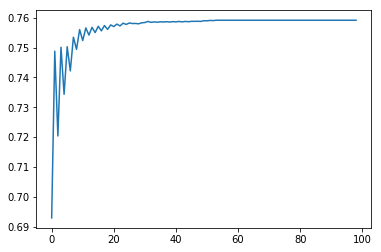

In [36]:
scores = pd.Series(scores)
scores.plot()

In [37]:
scores.describe()


count    99.000000
mean      0.756667
std       0.008294
min       0.692885
25%       0.758039
50%       0.759006
75%       0.759190
max       0.759190
dtype: float64